In [2]:
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pylab as plt

import tensorflow_hub as hub
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
IMAGE_SHAPE=(224,224)
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_50/classification/4",input_shape=IMAGE_SHAPE+(3,)
                  )])

In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14705928025738925144
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6533124185
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13032961143125132243
physical_device_desc: "device: 0, name: GeForce RTX 2060 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [5]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

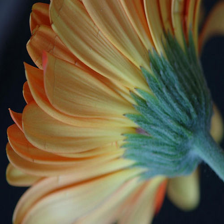

In [6]:
daisy_shape = Image.open('daisy.jpg').resize((224,224))
daisy_shape

In [7]:
daisy = np.array(daisy_shape)/225
daisy.shape

(224, 224, 3)

In [8]:
daisy

array([[[0.16      , 0.21333333, 0.28444444],
        [0.16444444, 0.21777778, 0.28888889],
        [0.16888889, 0.22222222, 0.29333333],
        ...,
        [0.18666667, 0.12      , 0.08888889],
        [0.20444444, 0.13333333, 0.09333333],
        [0.21333333, 0.13333333, 0.09777778]],

       [[0.16      , 0.20888889, 0.28888889],
        [0.16444444, 0.21333333, 0.29333333],
        [0.16888889, 0.21777778, 0.29777778],
        ...,
        [0.21777778, 0.14666667, 0.10222222],
        [0.23555556, 0.15555556, 0.10222222],
        [0.24888889, 0.16      , 0.10666667]],

       [[0.16      , 0.20888889, 0.29333333],
        [0.16444444, 0.21333333, 0.29777778],
        [0.16888889, 0.21777778, 0.30222222],
        ...,
        [0.26222222, 0.17333333, 0.10666667],
        [0.28444444, 0.18222222, 0.10666667],
        [0.29777778, 0.18666667, 0.11111111]],

       ...,

       [[0.04888889, 0.06666667, 0.12      ],
        [0.04888889, 0.06666667, 0.12      ],
        [0.04888889, 0

In [9]:
daisy[np.newaxis, ...].shape

(1, 224, 224, 3)

In [10]:
result = classifier.predict(daisy[np.newaxis, ...])
result.shape

(1, 1001)

In [11]:
predicted_label_index = np.argmax(result)
predicted_label_index

986

In [12]:
cd datasets/

C:\Users\cheny\Desktop\deep learning\datasets


In [13]:
pwd

'C:\\Users\\cheny\\Desktop\\deep learning\\datasets'

In [14]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 3291-95A0

 Directory of C:\Users\cheny\Desktop\deep learning\datasets

2020-12-30  01:30 PM    <DIR>          .
2020-12-30  01:30 PM    <DIR>          ..
2016-02-10  05:22 PM    <DIR>          flower_photo
2020-12-27  06:47 PM       228,813,984 flower_photo.tar.gz
2020-12-27  06:46 PM       228,813,984 flower_photos.tar.gz
2020-12-30  01:29 PM           110,448 Transfer Learning.ipynb
               3 File(s)    457,738,416 bytes
               3 Dir(s)  103,212,359,680 bytes free


In [15]:
flower_path = os.path.abspath("flower_photo/")
flower_path #this is the string path

'C:\\Users\\cheny\\Desktop\\deep learning\\datasets\\flower_photo'

In [16]:
import pathlib
flower_path = pathlib.Path(flower_path)
flower_path # convert it to windowns path and thne it can used with glob and .jpg to go through every photo

WindowsPath('C:/Users/cheny/Desktop/deep learning/datasets/flower_photo')

In [17]:
list(flower_path.glob('*/*.jpg'))[:5]

[WindowsPath('C:/Users/cheny/Desktop/deep learning/datasets/flower_photo/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('C:/Users/cheny/Desktop/deep learning/datasets/flower_photo/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('C:/Users/cheny/Desktop/deep learning/datasets/flower_photo/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('C:/Users/cheny/Desktop/deep learning/datasets/flower_photo/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('C:/Users/cheny/Desktop/deep learning/datasets/flower_photo/daisy/10172636503_21bededa75_n.jpg')]

In [18]:
image_count = len(list(flower_path.glob('*/*.jpg')))
image_count

3670

In [19]:
roses = list(flower_path.glob('roses/*'))
roses[:5]

[WindowsPath('C:/Users/cheny/Desktop/deep learning/datasets/flower_photo/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('C:/Users/cheny/Desktop/deep learning/datasets/flower_photo/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('C:/Users/cheny/Desktop/deep learning/datasets/flower_photo/roses/10503217854_e66a804309.jpg'),
 WindowsPath('C:/Users/cheny/Desktop/deep learning/datasets/flower_photo/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('C:/Users/cheny/Desktop/deep learning/datasets/flower_photo/roses/110472418_87b6a3aa98_m.jpg')]

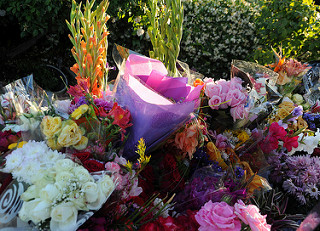

In [20]:
Image.open(str(roses[3]))

In [21]:
flower_image_dic = {
    'roses': list(flower_path.glob('roses/*')),
    'daisy': list(flower_path.glob('daisy/*')),
    'dandelion': list(flower_path.glob('dandelion/*')),
    'sunflowers': list(flower_path.glob('sunflowers/*')),
    'tulips': list(flower_path.glob('tulips/*'))
}

In [22]:
flower_name_dict = {
    'roses': 0,
    'daisy' :1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

In [23]:
img = cv2.imread(str(flower_image_dic['roses'][3]))
img.shape

(231, 320, 3)

In [24]:
cv2.resize(img, IMAGE_SHAPE).shape

(224, 224, 3)

In [25]:
X , y =[], []

for flower_name, images in flower_image_dic.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, IMAGE_SHAPE)
        X.append(resized_img)
        y.append(flower_name_dict[flower_name])

In [26]:
X = np.array(X)
y = np.array(y)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [28]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [30]:
X_train_scaled.shape

(2752, 224, 224, 3)

In [31]:
X[0].shape

(224, 224, 3)

In [32]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [33]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

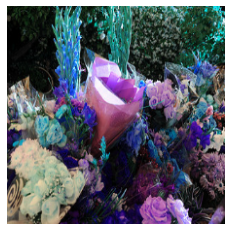

In [34]:
plt.axis('off')
plt.imshow(X[3])

In [35]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

array([928, 928, 724], dtype=int64)

In [36]:
feature_extractor_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrain_model_without_top_layer=hub.KerasLayer(feature_extractor_model, input_shape=(224,224,3), trainable=False) 
#trainable=false is freeze the hiddent layers,basically all the layers except the output layer

In [43]:
def get_model():
    nun_flower =5
    model = tf.keras.Sequential([
    pretrain_model_without_top_layer,
    tf.keras.layers.Dense(nun_flower)])
    
    model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['acc'])
    
    return model

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train, epochs=1)